In [55]:
import pandas as pd
from collections import Counter, OrderedDict
from matplotlib import pyplot as plt

In [60]:
plt.rcParams["figure.autolayout"] = True

In [21]:
!curl "https://raw.githubusercontent.com/dotnet/runtime/main/src/coreclr/gc/gc.cpp" -o "Files/gc.cpp"
!curl "https://raw.githubusercontent.com/dotnet/runtime/main/src/coreclr/gc/gcpriv.h" -o "Files/gcpriv.h" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1610k  100 1610k    0     0  3579k      0 --:--:-- --:--:-- --:--:-- 3587k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 53  179k   53 98576    0     0   207k      0 --:--:-- --:--:-- --:--:--  207k
100  179k  100  179k    0     0   350k      0 --:--:-- --:--:-- --:--:--  349k


In [22]:
gc_file = "./Files/gc.cpp"
with open(gc_file) as gc:
    gc_lines = gc.readlines()
    gc_all   = gc.read()
    
gc_priv_file = "./Files/gcpriv.h"
with open(gc_priv_file) as gc_priv:
    gc_priv_lines = gc_priv.readlines()
    gc_priv_all   = gc_priv.read()

In [23]:
print(f"gc.cpp has {len(gc_lines)} lines.")
print(f"gcpriv.h has {len(gc_priv_lines)} lines.")

gc.cpp has 46905 lines.
gcpriv.h has 6161 lines.


In [24]:
non_fwd_declared_classes_gc = [ (class_name.strip().split(' ')[1], idx) for idx, class_name in enumerate(gc_lines) if ("class" in class_name ) and (class_name.split(' ')[0] == "class") and (';' not in class_name) ]
gc_classes_df = pd.DataFrame(non_fwd_declared_classes_gc, columns= ['Class Name', 'Line #'])
gc_classes_df

,Class Name,Line #
0,gc_rand,31
1,t_join,750
2,exclusive_sync,1100
3,sorted_table,3271
4,CObjectHeader,4374
5,heap_select,5936
6,mark,6905
7,card_table_info,8160
8,introsort,9562
9,seg_free_spaces,10381


## C++ Analysis

In [73]:
def analyze_gc_cpp_based_on_csv(file_path):
    with open(file_path) as keywords_file:
        keywords = [line.split(',')[0].encode("ascii", "ignore").decode().replace('\n', '') for line in keywords_file.readlines()]
    keyword_counters = Counter()
    for keyword in keywords:
        keyword_counters[keyword] = 0
    for line in gc_lines:
        for keyword in keywords:
            if keyword in line.split(' ') and line.split(' ')[0].strip() != '//':
                keyword_counters[keyword] += 1
    return keyword_counters

### Keywords

Counter({'if': 3235, 'return': 1003, 'for': 848, 'int': 658, 'void': 527, 'while': 327, 'this': 295, 'new': 112, 'static': 104, 'goto': 91, 'else': 85, 'unsigned': 85, 'case': 84, 'do': 71, 'double': 71, 'const': 70, 'inline': 31, 'short': 29, 'float': 25, 'class': 24, 'delete': 24, 'switch': 19, 'try': 18, 'char': 17, 'struct': 12, 'enum': 6, 'catch': 5, 'continue': 5, 'long': 3, 'volatile': 3, 'default': 2, 'extern': 2, 'register': 2, 'throw': 2, 'public': 1, 'typedef': 1, 'virtual': 1, 'asm': 0, 'auto': 0, 'break': 0, 'friend': 0, 'namespace': 0, 'operator': 0, 'private': 0, 'protected': 0, 'signed': 0, 'template': 0, 'typename': 0, 'union': 0})


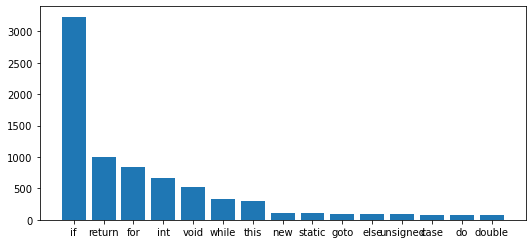

In [74]:
keyword_counters = analyze_gc_cpp_based_on_csv("./Files/ReservedKeywords.csv")
print(keyword_counters)
most_common_keywords = OrderedDict(keyword_counters.most_common(15))
plt.bar(most_common_keywords.keys(), most_common_keywords.values())
plt.show()

### Operators

Counter({'=': 10567, '/': 5160, '*': 3588, '-': 3538, ':': 3477, '&': 3134, '>': 2811, '.': 2765, '::': 2256, '->': 1934, '+': 1853, '!': 1453, '%': 1221, '<': 1132, '==': 1037, '&&': 679, '++': 624, '!=': 519, '>=': 489, '|': 396, '+=': 377, '?': 376, '||': 286, '<=': 237, 'sizeof': 232, '**': 205, '--': 143, '<<': 126, '~': 84, '>>': 82, '-=': 70, '^': 25, '/=': 11, '*=': 6, '%=': 1})


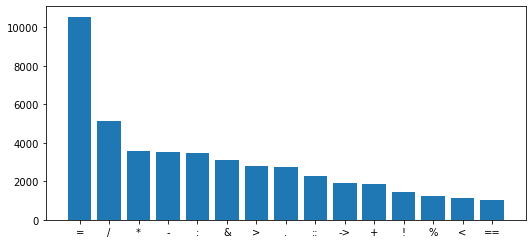

In [66]:
operators_counter = analyze_gc_cpp_based_on_csv("./Files/Operators.csv")
print(operators_counter)
most_common_operators = OrderedDict(operators_counter.most_common(15))
plt.bar(most_common_operators.keys(), most_common_operators.values())
plt.show()

### Directives

Counter({'#if': 1715, '#endif': 1713, '#ifdef': 1463, '#else': 421, '#ifndef': 152, '#define': 139, '#pragma': 36, '#undef': 7, '#error': 6, '#elif': 5, '#include': 3, '#import': 0, '#line': 0, '#using': 0})


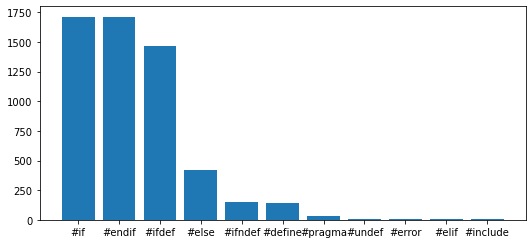

In [69]:
directives_counter = analyze_gc_cpp_based_on_csv("./Files/PreprocessorDirectives.csv")
print(directives_counter)
most_common_directives = OrderedDict(directives_counter.most_common(11))
plt.bar(most_common_directives.keys(), most_common_directives.values())
plt.show()